<a href="https://colab.research.google.com/github/Akashpandey1507/Hotel-Booking-with-PySpark/blob/main/Hotel_Booking_Analysis_with_Py_Spark_EDA_Analsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Demand with Economic Indicators

To download the datasets and all project for [Click Here](https://github.com/Akashpandey1507/Hotel-Booking-with-PySpark/)

# About Dataset
* This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017. I have coupled each month of booking with leading economic indicators for the United States for that timeframe using the FRED.

* While this dataset does not specify the location of the hotels, I have gone with the assumption of both being located in the United States for ease of applying economic data for learning purposes

# Acknowledgments
* The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. The original cleaned version was uploaded to Kaggle by by Thomas Mock and Antoine Bichat. I used that dataset to couple with various indicators:

* GDP
* CPI
* CPI for Hotels
* Fuel Prices
* Disposable income per capita
* Inflation
* Consumer Sentiment
* GINI Indicator

In [153]:
!pip install pyspark
#installing the pyspark

In [154]:
# Importing libraries
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
spark = SparkSession.builder.appName("Hotel Booking").getOrCreate()

In [156]:
file = "/content/drive/MyDrive/Data Analysis Files/hotel_bookings_raw.csv"

In [157]:
original_datasets = spark.read.csv(
    file,
    header=True,
    inferSchema=True
)

In [158]:
df = original_datasets.alias("copy")

In [159]:
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+------+-------+---------+-------------+---------+------+-------+---------+---------+-----------+-------+-------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_cha

In [160]:
df.count()

119390

In [161]:
df.columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'MO_YR',
 'CPI_AVG',
 'INFLATION',
 'INFLATION_CHG',
 'CSMR_SENT',
 'UNRATE',
 'INTRSRT',
 'GDP',
 'FUEL_PRCS',
 'CPI_HOTELS',
 'US_GINI',
 'DIS_INC']

In [162]:
len(df.columns)

43

In [163]:
print(f"The Datasets is having {df.count()} rows and {len(df.columns)} columns.")

The Datasets is having 119390 rows and 43 columns.


In [164]:
df.select([f.sum(f.col(i).isNull().cast('int')).alias(i) for i in df.columns]).show()

+-----+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+-----+-------+---------+-------------+---------+------+-------+---+---------+----------+-------+-------+
|hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|d

In [165]:
df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

In [166]:
[i for i,v in df.dtypes if v in ['string']]

['hotel',
 'arrival_date_month',
 'children',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'MO_YR',
 'CPI_AVG',
 'INFLATION',
 'INFLATION_CHG',
 'CSMR_SENT',
 'UNRATE',
 'INTRSRT',
 'GDP',
 'FUEL_PRCS',
 'CPI_HOTELS',
 'US_GINI',
 'DIS_INC']

In [167]:
df.select([i for i,v in df.dtypes if v in ['string']]).show()

+------------+------------------+--------+----+-------+--------------+--------------------+------------------+------------------+------------+-----+-------------+------------------+-----------------------+------+-------+---------+-------------+---------+------+-------+---------+---------+-----------+-------+-------+
|       hotel|arrival_date_month|children|meal|country|market_segment|distribution_channel|reserved_room_type|assigned_room_type|deposit_type|agent|customer_type|reservation_status|reservation_status_date| MO_YR|CPI_AVG|INFLATION|INFLATION_CHG|CSMR_SENT|UNRATE|INTRSRT|      GDP|FUEL_PRCS| CPI_HOTELS|US_GINI|DIS_INC|
+------------+------------------+--------+----+-------+--------------+--------------------+------------------+------------------+------------+-----+-------------+------------------+-----------------------+------+-------+---------+-------------+---------+------+-------+---------+---------+-----------+-------+-------+
|Resort Hotel|              July|       0|  BB

In [168]:
df.groupBy(f.col('CPI_AVG')).count().show()

+-------+-----+
|CPI_AVG|count|
+-------+-----+
|243.892| 4826|
|244.193| 4634|
|244.243| 4038|
|238.034| 3615|
|237.733| 5742|
|237.652| 4482|
|237.001|  275|
|244.006| 4858|
|238.017| 3077|
|237.761| 3062|
|245.183| 3417|
|236.222|  151|
|235.342|   44|
|240.222| 4552|
|244.004| 5006|
|242.026| 5021|
|244.163| 4060|
|241.176| 4993|
|242.637| 4338|
|246.435|  393|
+-------+-----+
only showing top 20 rows



In [169]:
df = df.withColumn("CPI_AVG", f.col("CPI_AVG").cast("double"))
df = df.withColumn("INFLATION_CHG", f.col("INFLATION_CHG").cast("double"))
df = df.withColumn("CSMR_SENT", f.col("CSMR_SENT").cast("double"))
df = df.withColumn("UNRATE", f.col("UNRATE").cast("double"))
df = df.withColumn("INTRSRT", f.col("INTRSRT").cast("double"))
df = df.withColumn("GDP", f.col("GDP").cast("double"))
df = df.withColumn("FUEL_PRCS", f.col("FUEL_PRCS").cast("double"))
df = df.withColumn("CPI_HOTELS", f.col("CPI_HOTELS").cast("double"))
df = df.withColumn("US_GINI", f.col("US_GINI").cast("double"))
df = df.withColumn("DIS_INC", f.col("DIS_INC").cast("double"))
df = df.withColumn("INFLATION", f.col("INFLATION").cast("double"))
df = df.withColumn("children", f.col("children").cast("double"))
df = df.withColumn("agent", (f.when(f.col("agent")== "NULL", "0").otherwise(f.col("agent"))).cast('double'))

In [170]:
[i for i,v in df.dtypes if v in ['string']]

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'MO_YR']

In [171]:
df.select([i for i,v in df.dtypes if v in ['string']]).show()

+------------+------------------+----+-------+--------------+--------------------+------------------+------------------+------------+-------------+------------------+-----------------------+------+
|       hotel|arrival_date_month|meal|country|market_segment|distribution_channel|reserved_room_type|assigned_room_type|deposit_type|customer_type|reservation_status|reservation_status_date| MO_YR|
+------------+------------------+----+-------+--------------+--------------------+------------------+------------------+------------+-------------+------------------+-----------------------+------+
|Resort Hotel|              July|  BB|    PRT|        Direct|              Direct|                 C|                 C|  No Deposit|    Transient|         Check-Out|               7/1/2015|7-2015|
|Resort Hotel|              July|  BB|    PRT|        Direct|              Direct|                 C|                 C|  No Deposit|    Transient|         Check-Out|               7/1/2015|7-2015|
|Resort Ho

In [172]:
from pyspark.sql import types as t

In [173]:
[i for i,v in df.dtypes if v in ['string']]

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'MO_YR']

In [174]:
df.select([i for i,v in df.dtypes if v in ['string']]).show()

+------------+------------------+----+-------+--------------+--------------------+------------------+------------------+------------+-------------+------------------+-----------------------+------+
|       hotel|arrival_date_month|meal|country|market_segment|distribution_channel|reserved_room_type|assigned_room_type|deposit_type|customer_type|reservation_status|reservation_status_date| MO_YR|
+------------+------------------+----+-------+--------------+--------------------+------------------+------------------+------------+-------------+------------------+-----------------------+------+
|Resort Hotel|              July|  BB|    PRT|        Direct|              Direct|                 C|                 C|  No Deposit|    Transient|         Check-Out|               7/1/2015|7-2015|
|Resort Hotel|              July|  BB|    PRT|        Direct|              Direct|                 C|                 C|  No Deposit|    Transient|         Check-Out|               7/1/2015|7-2015|
|Resort Ho

In [175]:
df.select("reservation_status_date").show()

+-----------------------+
|reservation_status_date|
+-----------------------+
|               7/1/2015|
|               7/1/2015|
|               7/2/2015|
|               7/2/2015|
|               7/3/2015|
|               7/3/2015|
|               7/3/2015|
|               7/3/2015|
|               5/6/2015|
|              4/22/2015|
|              6/23/2015|
|               7/5/2015|
|               7/5/2015|
|               7/5/2015|
|               7/5/2015|
|               7/5/2015|
|               7/5/2015|
|               7/2/2015|
|               7/2/2015|
|               7/5/2015|
+-----------------------+
only showing top 20 rows



In [176]:
df.groupBy(f.col("reservation_status_date")).count().show()

+-----------------------+-----+
|reservation_status_date|count|
+-----------------------+-----+
|             11/14/2015|   80|
|              6/29/2016|  113|
|              7/31/2016|  125|
|              8/21/2016|  139|
|              12/8/2016|  153|
|              3/20/2017|  194|
|              2/27/2015|    1|
|              8/31/2015|  116|
|               8/9/2016|  121|
|             11/24/2016|  172|
|               5/7/2017|  146|
|             11/26/2015|  135|
|              8/28/2016|  134|
|              2/14/2017|  121|
|              4/10/2017|  164|
|              6/11/2016|   89|
|              8/31/2016|  155|
|             11/30/2016|  137|
|              7/20/2017|  104|
|              6/15/2015|   53|
+-----------------------+-----+
only showing top 20 rows



In [177]:
df = df.withColumn("reservation_status_date", f.to_date(df["reservation_status_date"], "M/d/yyyy"))

In [178]:
df.select("reservation_status_date").show()

+-----------------------+
|reservation_status_date|
+-----------------------+
|             2015-07-01|
|             2015-07-01|
|             2015-07-02|
|             2015-07-02|
|             2015-07-03|
|             2015-07-03|
|             2015-07-03|
|             2015-07-03|
|             2015-05-06|
|             2015-04-22|
|             2015-06-23|
|             2015-07-05|
|             2015-07-05|
|             2015-07-05|
|             2015-07-05|
|             2015-07-05|
|             2015-07-05|
|             2015-07-02|
|             2015-07-02|
|             2015-07-05|
+-----------------------+
only showing top 20 rows



In [179]:
[i for i,v in df.dtypes if v in ['string']]

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'MO_YR']

In [180]:
df.select([i for i,v in df.dtypes if v in ['string']]).show()

+------------+------------------+----+-------+--------------+--------------------+------------------+------------------+------------+-------------+------------------+------+
|       hotel|arrival_date_month|meal|country|market_segment|distribution_channel|reserved_room_type|assigned_room_type|deposit_type|customer_type|reservation_status| MO_YR|
+------------+------------------+----+-------+--------------+--------------------+------------------+------------------+------------+-------------+------------------+------+
|Resort Hotel|              July|  BB|    PRT|        Direct|              Direct|                 C|                 C|  No Deposit|    Transient|         Check-Out|7-2015|
|Resort Hotel|              July|  BB|    PRT|        Direct|              Direct|                 C|                 C|  No Deposit|    Transient|         Check-Out|7-2015|
|Resort Hotel|              July|  BB|    GBR|        Direct|              Direct|                 A|                 C|  No Depos

In [181]:
[i for i,v in df.dtypes if v in ['int', 'double']]

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'CPI_AVG',
 'INFLATION',
 'INFLATION_CHG',
 'CSMR_SENT',
 'UNRATE',
 'INTRSRT',
 'GDP',
 'FUEL_PRCS',
 'CPI_HOTELS',
 'US_GINI',
 'DIS_INC']

In [182]:
df.select([i for i,v in df.dtypes if v in ['int', 'double']]).show()

+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+----------------------+------------------------------+---------------+-----+--------------------+------+---------------------------+-------------------------+-------+---------+-------------+---------+------+-------+---------+---------+-----------+-------+-------+
|is_canceled|lead_time|arrival_date_year|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|booking_changes|agent|days_in_waiting_list|   adr|required_car_parking_spaces|total_of_special_requests|CPI_AVG|INFLATION|INFLATION_CHG|CSMR_SENT|UNRATE|INTRSRT|      GDP|FUEL_PRCS| CPI_HOTELS|US_GINI|DIS_INC|
+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+

In [183]:
[i for i,v in df.dtypes if v in ['date']]

['reservation_status_date']

In [184]:
df.select([i for i,v in df.dtypes if v in ['date']]).show()

+-----------------------+
|reservation_status_date|
+-----------------------+
|             2015-07-01|
|             2015-07-01|
|             2015-07-02|
|             2015-07-02|
|             2015-07-03|
|             2015-07-03|
|             2015-07-03|
|             2015-07-03|
|             2015-05-06|
|             2015-04-22|
|             2015-06-23|
|             2015-07-05|
|             2015-07-05|
|             2015-07-05|
|             2015-07-05|
|             2015-07-05|
|             2015-07-05|
|             2015-07-02|
|             2015-07-02|
|             2015-07-05|
+-----------------------+
only showing top 20 rows



In [185]:
df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

In [186]:
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+------+-------+---------+-------------+---------+------+-------+---------+---------+-----------+-------+-------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_cha

# EDA on the Datasets

In [187]:
df.count()

119390

In [188]:
df.columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'MO_YR',
 'CPI_AVG',
 'INFLATION',
 'INFLATION_CHG',
 'CSMR_SENT',
 'UNRATE',
 'INTRSRT',
 'GDP',
 'FUEL_PRCS',
 'CPI_HOTELS',
 'US_GINI',
 'DIS_INC']

# Columns Details;

* hotel: This column indicates the type of hotel, either "Resort Hotel" or "City Hotel."
* is_canceled: This column is a binary indicator (0 or 1) that represents whether a booking was canceled (1) or not (0).
* lead_time: It represents the number of days between the booking date and the arrival date.
* arrival_date_year: The year of arrival.
* arrival_date_month: The month of arrival.
* arrival_date_week_number: The week number of the arrival date.

* arrival_date_day_of_month: The day of the month of the arrival date.

* stays_in_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest booked to stay.

* stays_in_week_nights: The number of weekday nights (Monday to Friday) the guest booked to stay.

* adults: The number of adults included in the booking.

* children: The number of children included in the booking.

* babies: The number of babies included in the booking.

* meal: The type of meal booked (e.g., BB for Bed & Breakfast, HB for Half Board).

* country: The country of origin of the guest.

* market_segment: The market segment that made the booking (e.g., Online Travel Agents, Corporate).

* distribution_channel: The distribution channel through which the booking was made (e.g., Direct, TA/TO).

* is_repeated_guest: A binary indicator (0 or 1) indicating whether the guest is a repeated guest at the hotel.

* previous_cancellations: The number of previous booking cancellations by the guest.

* previous_bookings_not_canceled: The number of previous bookings that were not canceled by the guest.

* reserved_room_type: The room type reserved by the guest.

* assigned_room_type: The room type assigned to the guest upon arrival.

* booking_changes: The number of changes made to the booking.

* deposit_type: The type of deposit made for the booking.

* agent: The ID of the travel agency that made the booking.

* days_in_waiting_list: The number of days the booking was in the waiting list before it was confirmed.

* customer_type: The type of customer (e.g., Transient, Contract).

* adr: The average daily rate (the average price per night for the booking).

* required_car_parking_spaces: The number of car parking spaces required by the guest.

* total_of_special_requests: The total number of special requests made by the guest.

* reservation_status: The reservation status (e.g., Check-Out, Canceled).

* reservation_status_date: The date at which the reservation status was recorded.

* MO_YR: A combination of the month and year for analysis.

* CPI_AVG: The average Consumer Price Index (CPI).

* INFLATION: The inflation rate.

* INFLATION_CHG: The change in inflation rate.

* CSMR_SENT: Consumer sentiment index.

* UNRATE: The unemployment rate.

* INTRSRT: Interest rate.

* GDP: Gross Domestic Product.

* FUEL_PRCS: Fuel prices.

* CPI_HOTELS: CPI for hotels.

* US_GINI: GINI index for the United States.

* DIS_INC: Disposable income.

In [189]:
len(df.columns)

43

# Descriptive Analysis

In [190]:
df.describe().show()

+-------+------------+-------------------+------------------+------------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------------------+-------------------+--------------------+---------+-------+--------------+--------------------+-------------------+----------------------+------------------------------+------------------+------------------+-------------------+------------+-----------------+--------------------+---------------+-----------------+---------------------------+-------------------------+------------------+------+------------------+------------------+--------------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+-------------------+-----------------+
|summary|       hotel|        is_canceled|         lead_time| arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|sta

# Which month had the highest number of bookings in the dataset, and which had the highest cancellations?

In [191]:
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+------+-------+---------+-------------+---------+------+-------+---------+---------+-----------+-------+-------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_cha

In [192]:
best_month_for_booking = df.groupBy(f.col("arrival_date_month")).count()
best_month_for_booking.show()

+------------------+-----+
|arrival_date_month|count|
+------------------+-----+
|              July|12661|
|          November| 6794|
|          February| 8068|
|           January| 5929|
|             March| 9794|
|           October|11160|
|               May|11791|
|            August|13877|
|             April|11089|
|              June|10939|
|          December| 6780|
|         September|10508|
+------------------+-----+



In [193]:
best_month_for_booking = best_month_for_booking.toPandas()
best_month_for_booking

,arrival_date_month,count
0,July,12661
1,November,6794
2,February,8068
3,January,5929
4,March,9794
5,October,11160
6,May,11791
7,August,13877
8,April,11089
9,June,10939


<Axes: title={'center': 'Best month for bookings'}, xlabel='arrival_date_month', ylabel='count'>

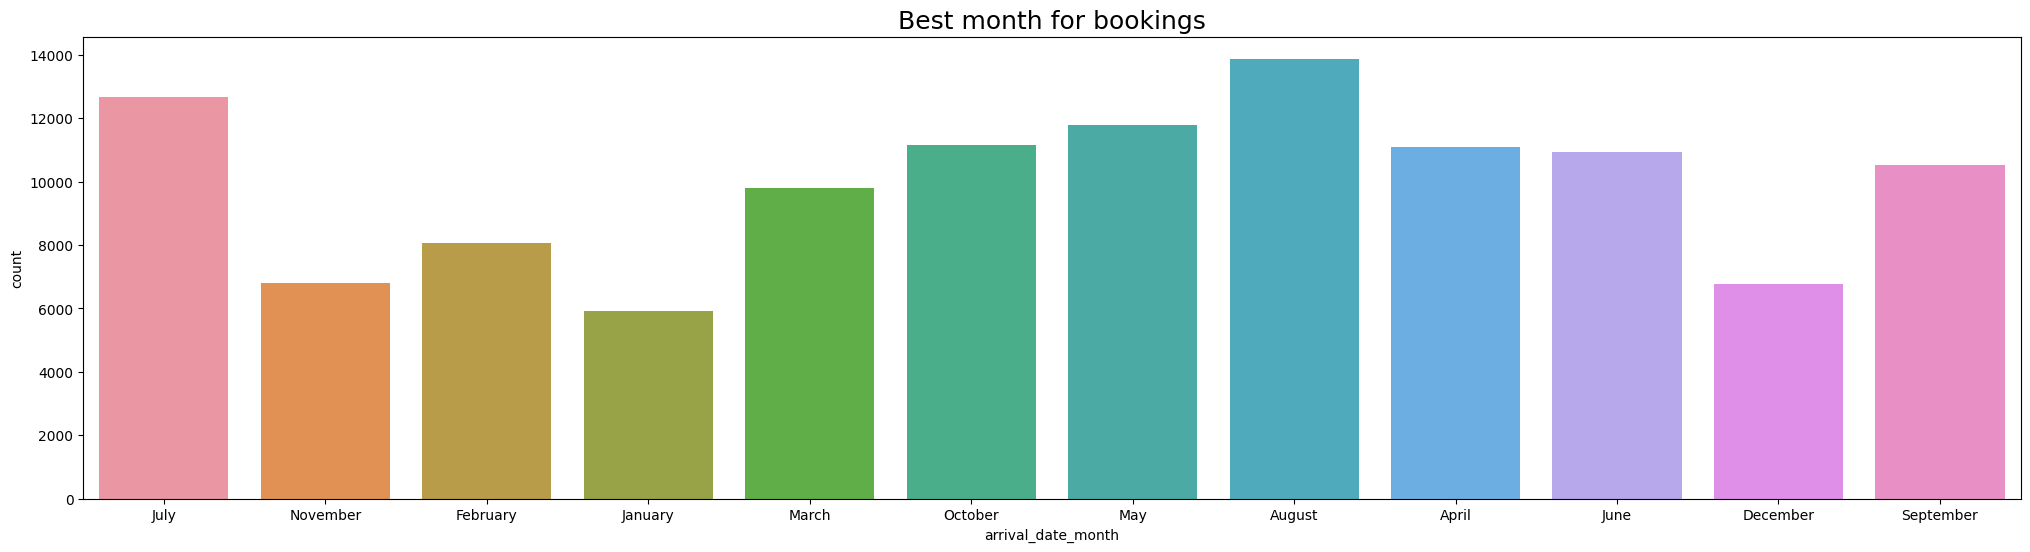

In [194]:
plt.figure(figsize=(25,6))
plt.title("Best month for bookings", fontsize=18)

sns.barplot( data=best_month_for_booking, x="arrival_date_month", y="count")

* The August month is the best in term of booking.

In [195]:
cancelled_df = df.filter(df["is_canceled"] == 1 )
cancelled_df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+------+-------+---------+-------------+---------+------+-------+---------+---------+-----------+-------+-------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_cha

In [196]:
cancelled_df = cancelled_df.groupBy("arrival_date_month").agg(f.count(f.col("is_canceled")).alias("Cancel_number"))
cancelled_df.show()

+------------------+-------------+
|arrival_date_month|Cancel_number|
+------------------+-------------+
|              July|         4742|
|          November|         2122|
|          February|         2696|
|           January|         1807|
|             March|         3149|
|           October|         4246|
|               May|         4677|
|            August|         5239|
|             April|         4524|
|              June|         4535|
|          December|         2371|
|         September|         4116|
+------------------+-------------+



In [197]:
cancelled_df = cancelled_df.toPandas()
cancelled_df

,arrival_date_month,Cancel_number
0,July,4742
1,November,2122
2,February,2696
3,January,1807
4,March,3149
5,October,4246
6,May,4677
7,August,5239
8,April,4524
9,June,4535


<Axes: title={'center': 'worst month for booking cancelled'}, xlabel='arrival_date_month', ylabel='Cancel_number'>

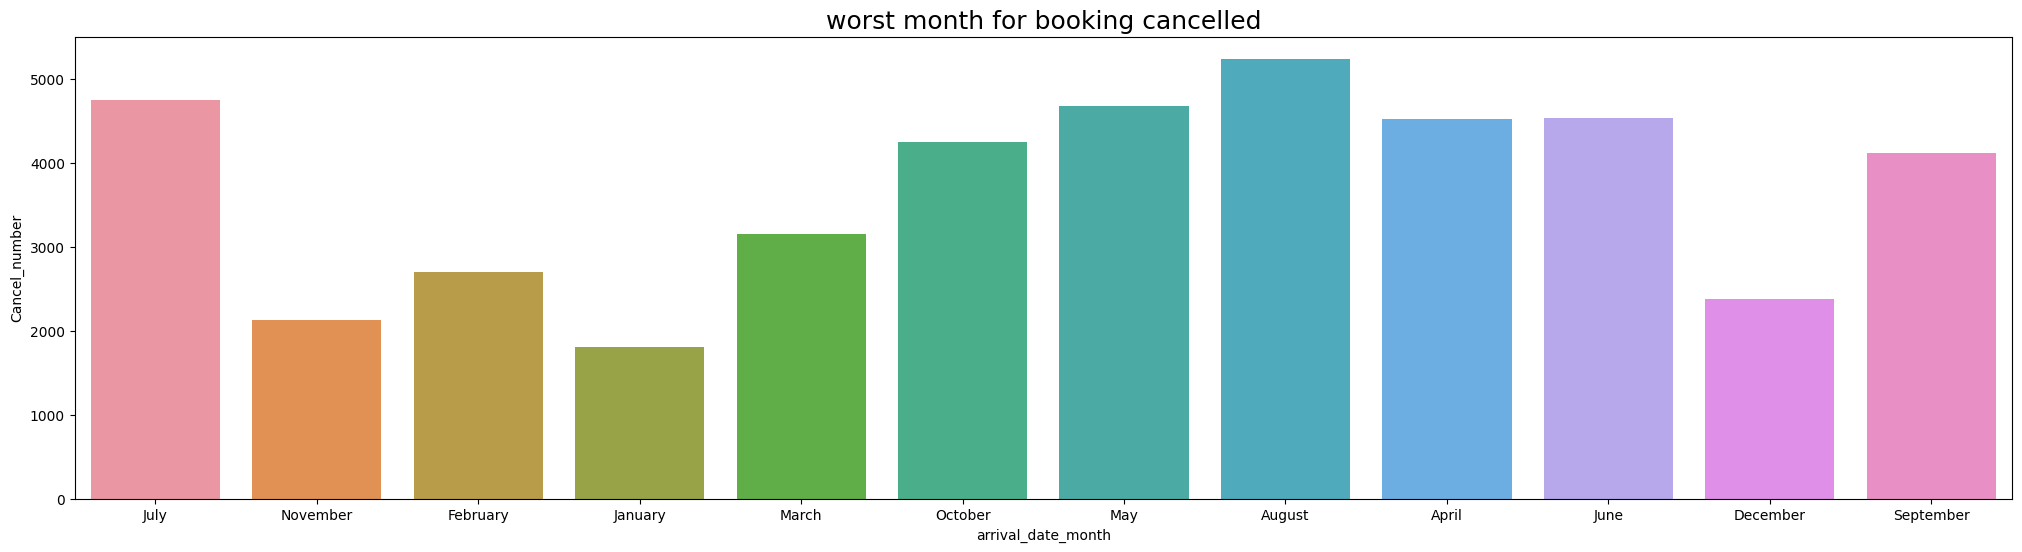

In [198]:
plt.figure(figsize=(25,6))
plt.title("worst month for booking cancelled", fontsize=18)

sns.barplot( data=cancelled_df, x="arrival_date_month", y="Cancel_number")

* The August month is the worst month as well

# What is the overall cancellation rate for the resort hotel and how does it compare to the city hotel?

In [199]:
cancellation_rate = df.select("hotel")
cancellation_rate.show()

+------------+
|       hotel|
+------------+
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
|Resort Hotel|
+------------+
only showing top 20 rows



In [200]:
cancellation_rate = cancellation_rate.groupBy(f.col("Hotel")).count()
cancellation_rate.show()

+------------+-----+
|       Hotel|count|
+------------+-----+
|  City Hotel|79330|
|Resort Hotel|40060|
+------------+-----+



In [201]:
cancellation_rate_pd = cancellation_rate.toPandas()

<Axes: ylabel='count'>

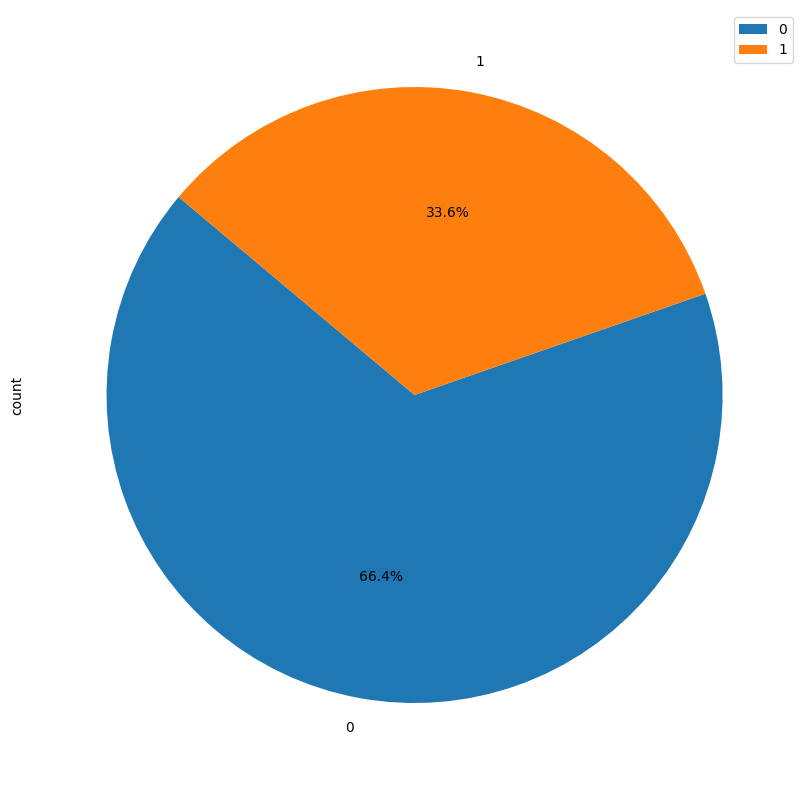

In [202]:
cancellation_rate_pd.plot(kind='pie', x='Hotel', y="count" ,autopct='%1.1f%%', startangle=140, figsize=(25,10) )

In [203]:
cencelled_df = df.select("hotel", "is_canceled")
cencelled_df.show()

+------------+-----------+
|       hotel|is_canceled|
+------------+-----------+
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          1|
|Resort Hotel|          1|
|Resort Hotel|          1|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
|Resort Hotel|          0|
+------------+-----------+
only showing top 20 rows



In [204]:
len_of_Resort_Hote = df.filter(df["Hotel"] == "Resort Hotel").count()
len_of_City_Hote = df.filter(df["Hotel"] == "City Hotel").count()

In [205]:
len_of_Resort_Hote

40060

In [206]:
len_of_City_Hote

79330

In [207]:
# Calculate the cancellation rate for the resort hotel
resort_cancellation_rate = df.filter(df["hotel"] == "Resort Hotel") \
    .select(f.sum(f.col('is_canceled')).alias('sum')) \
    .collect()[0]['sum']  # Collect the result and get the 'sum' value

# Calculate the total number of bookings for the resort hotel
len_of_resort_hotel = df.filter(df["hotel"] == "Resort Hotel").count()

# Calculate the cancellation rate as a percentage
resort_cancellation_rate_percentage = (resort_cancellation_rate / len_of_resort_hotel) * 100

# Print the cancellation rate
print(f"Resort Hotel Cancellation Rate: {resort_cancellation_rate_percentage:.2f}%")


Resort Hotel Cancellation Rate: 27.76%


In [208]:
# Calculate the cancellation rate for the City hotel
city_cancellation_rate = df.filter(df["hotel"] == "City Hotel") \
    .select(f.sum(f.col('is_canceled')).alias('sum')) \
    .collect()[0]['sum']  # Collect the result and get the 'sum' value

# Calculate the total number of bookings for the City hotel
len_of_City_hotel = df.filter(df["hotel"] == "City Hotel").count()

# Calculate the cancellation rate as a percentage
City_cancellation_rate_percentage = (city_cancellation_rate / len_of_City_Hote) * 100

# Print the cancellation rate
print(f"City Hotel Cancellation Rate: {City_cancellation_rate_percentage:.2f}%")


City Hotel Cancellation Rate: 41.73%


# Can you identify any correlations between economic indicators (e.g., GDP, unemployment rate) and the number of bookings or cancellations in the dataset?